In [1]:
import pandas as pd

data = pd.read_csv('data/^NDX_raw_data.csv')
data.rename(columns={'Date': 'date', 'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume'}, inplace=True)

In [2]:
data = data.iloc[:3524]

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_close = seasonal_decompose(data['close'], model='additive', period=30)
trend_close = decomposition_close.trend
seasonal_close = decomposition_close.seasonal
resid_close = decomposition_close.resid

decomposition_high = seasonal_decompose(data['high'], model='additive', period=30)
trend_high = decomposition_high.trend
seasonal_high = decomposition_high.seasonal
resid_high = decomposition_high.resid

decomposition_low = seasonal_decompose(data['low'], model='additive', period=30)
trend_low = decomposition_low.trend
seasonal_low = decomposition_low.seasonal
resid_low = decomposition_low.resid

data['trend_close'] = trend_close
data['trend_high'] = trend_high
data['trend_low'] = trend_low

data.dropna(axis=0, inplace=True)

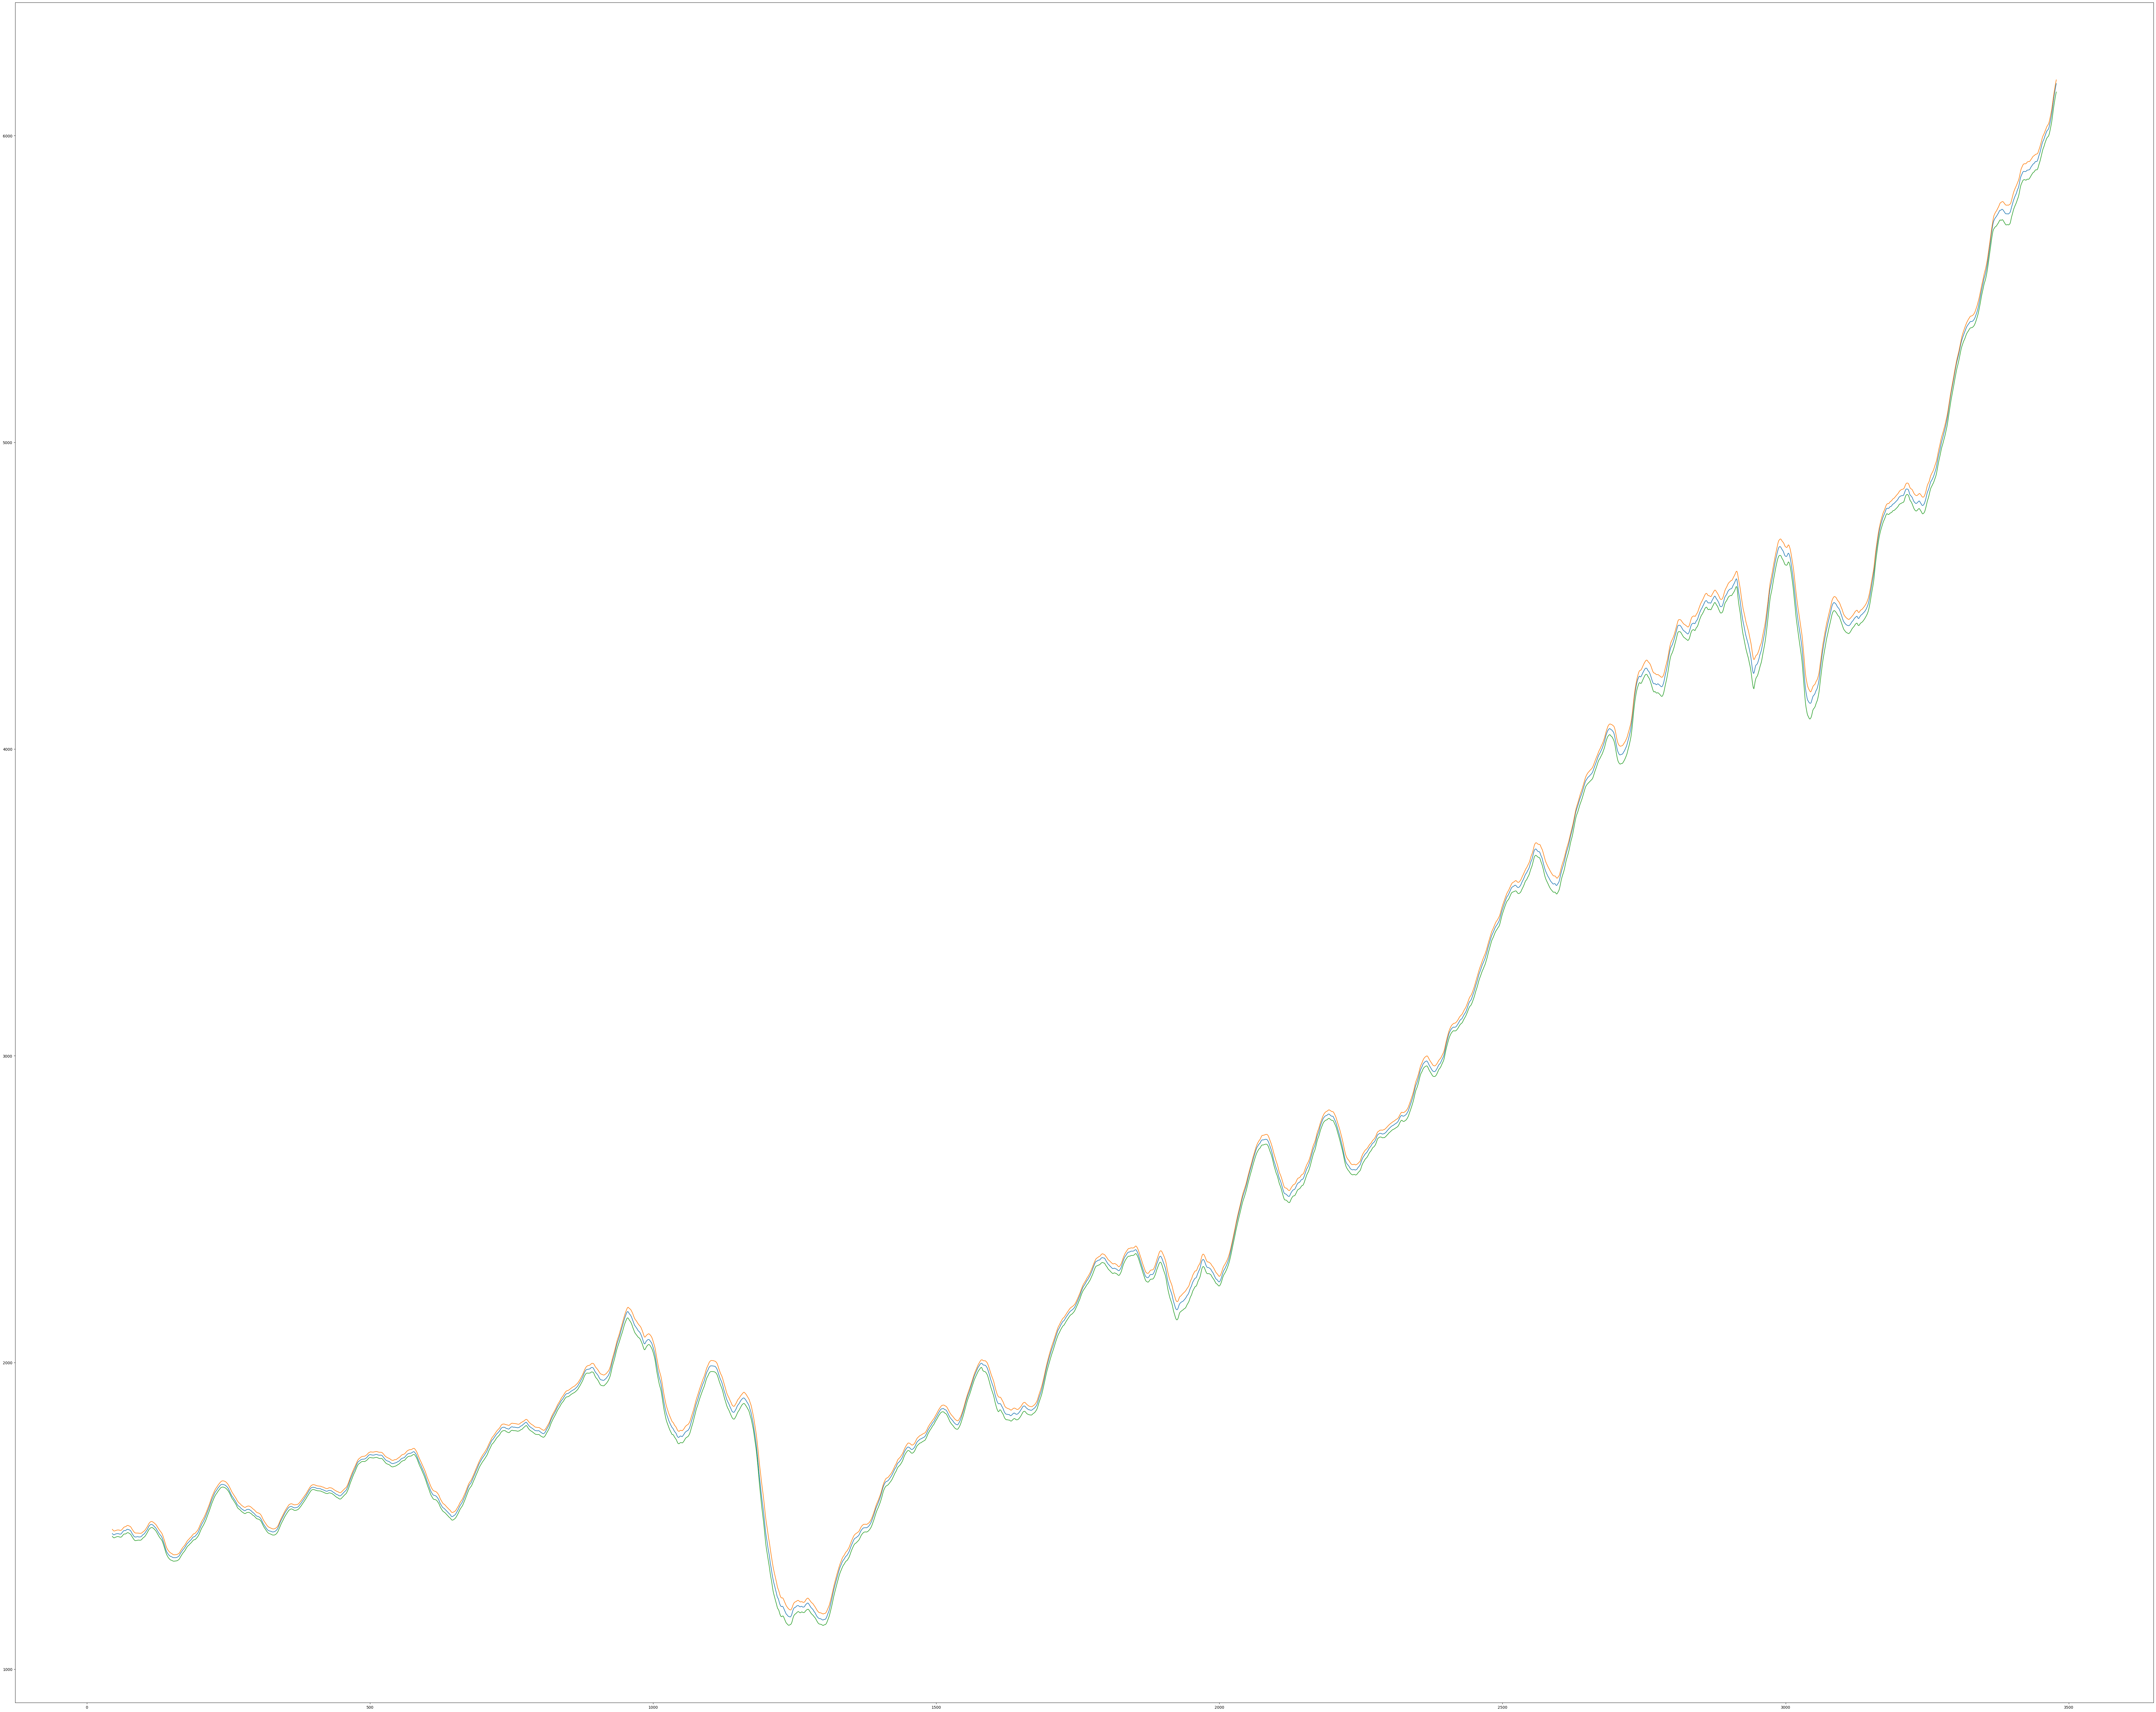

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 80))
plt.plot(data.index, data['trend_close'], label='trend close')
plt.plot(data.index, data['trend_high'], label='trend high')
plt.plot(data.index, data['trend_low'], label='trend low')

In [12]:
detrend_close = seasonal_close + resid_close
detrend_high = seasonal_high + resid_high
detrend_low = seasonal_low + resid_low

In [9]:
std_dev_detrend_high = detrend_high.std()
std_dev_detrend_low = detrend_low.std()

In [13]:
draft_no_outlier = list()

for val in detrend_close:
    if val > std_dev_detrend_high:
        draft_no_outlier.append(std_dev_detrend_high)
    elif val < -std_dev_detrend_low:
        draft_no_outlier.append(-std_dev_detrend_low)
    else:
        draft_no_outlier.append(val)

draft_no_outlier = pd.Series(draft_no_outlier)

In [14]:
observation = trend_close + draft_no_outlier

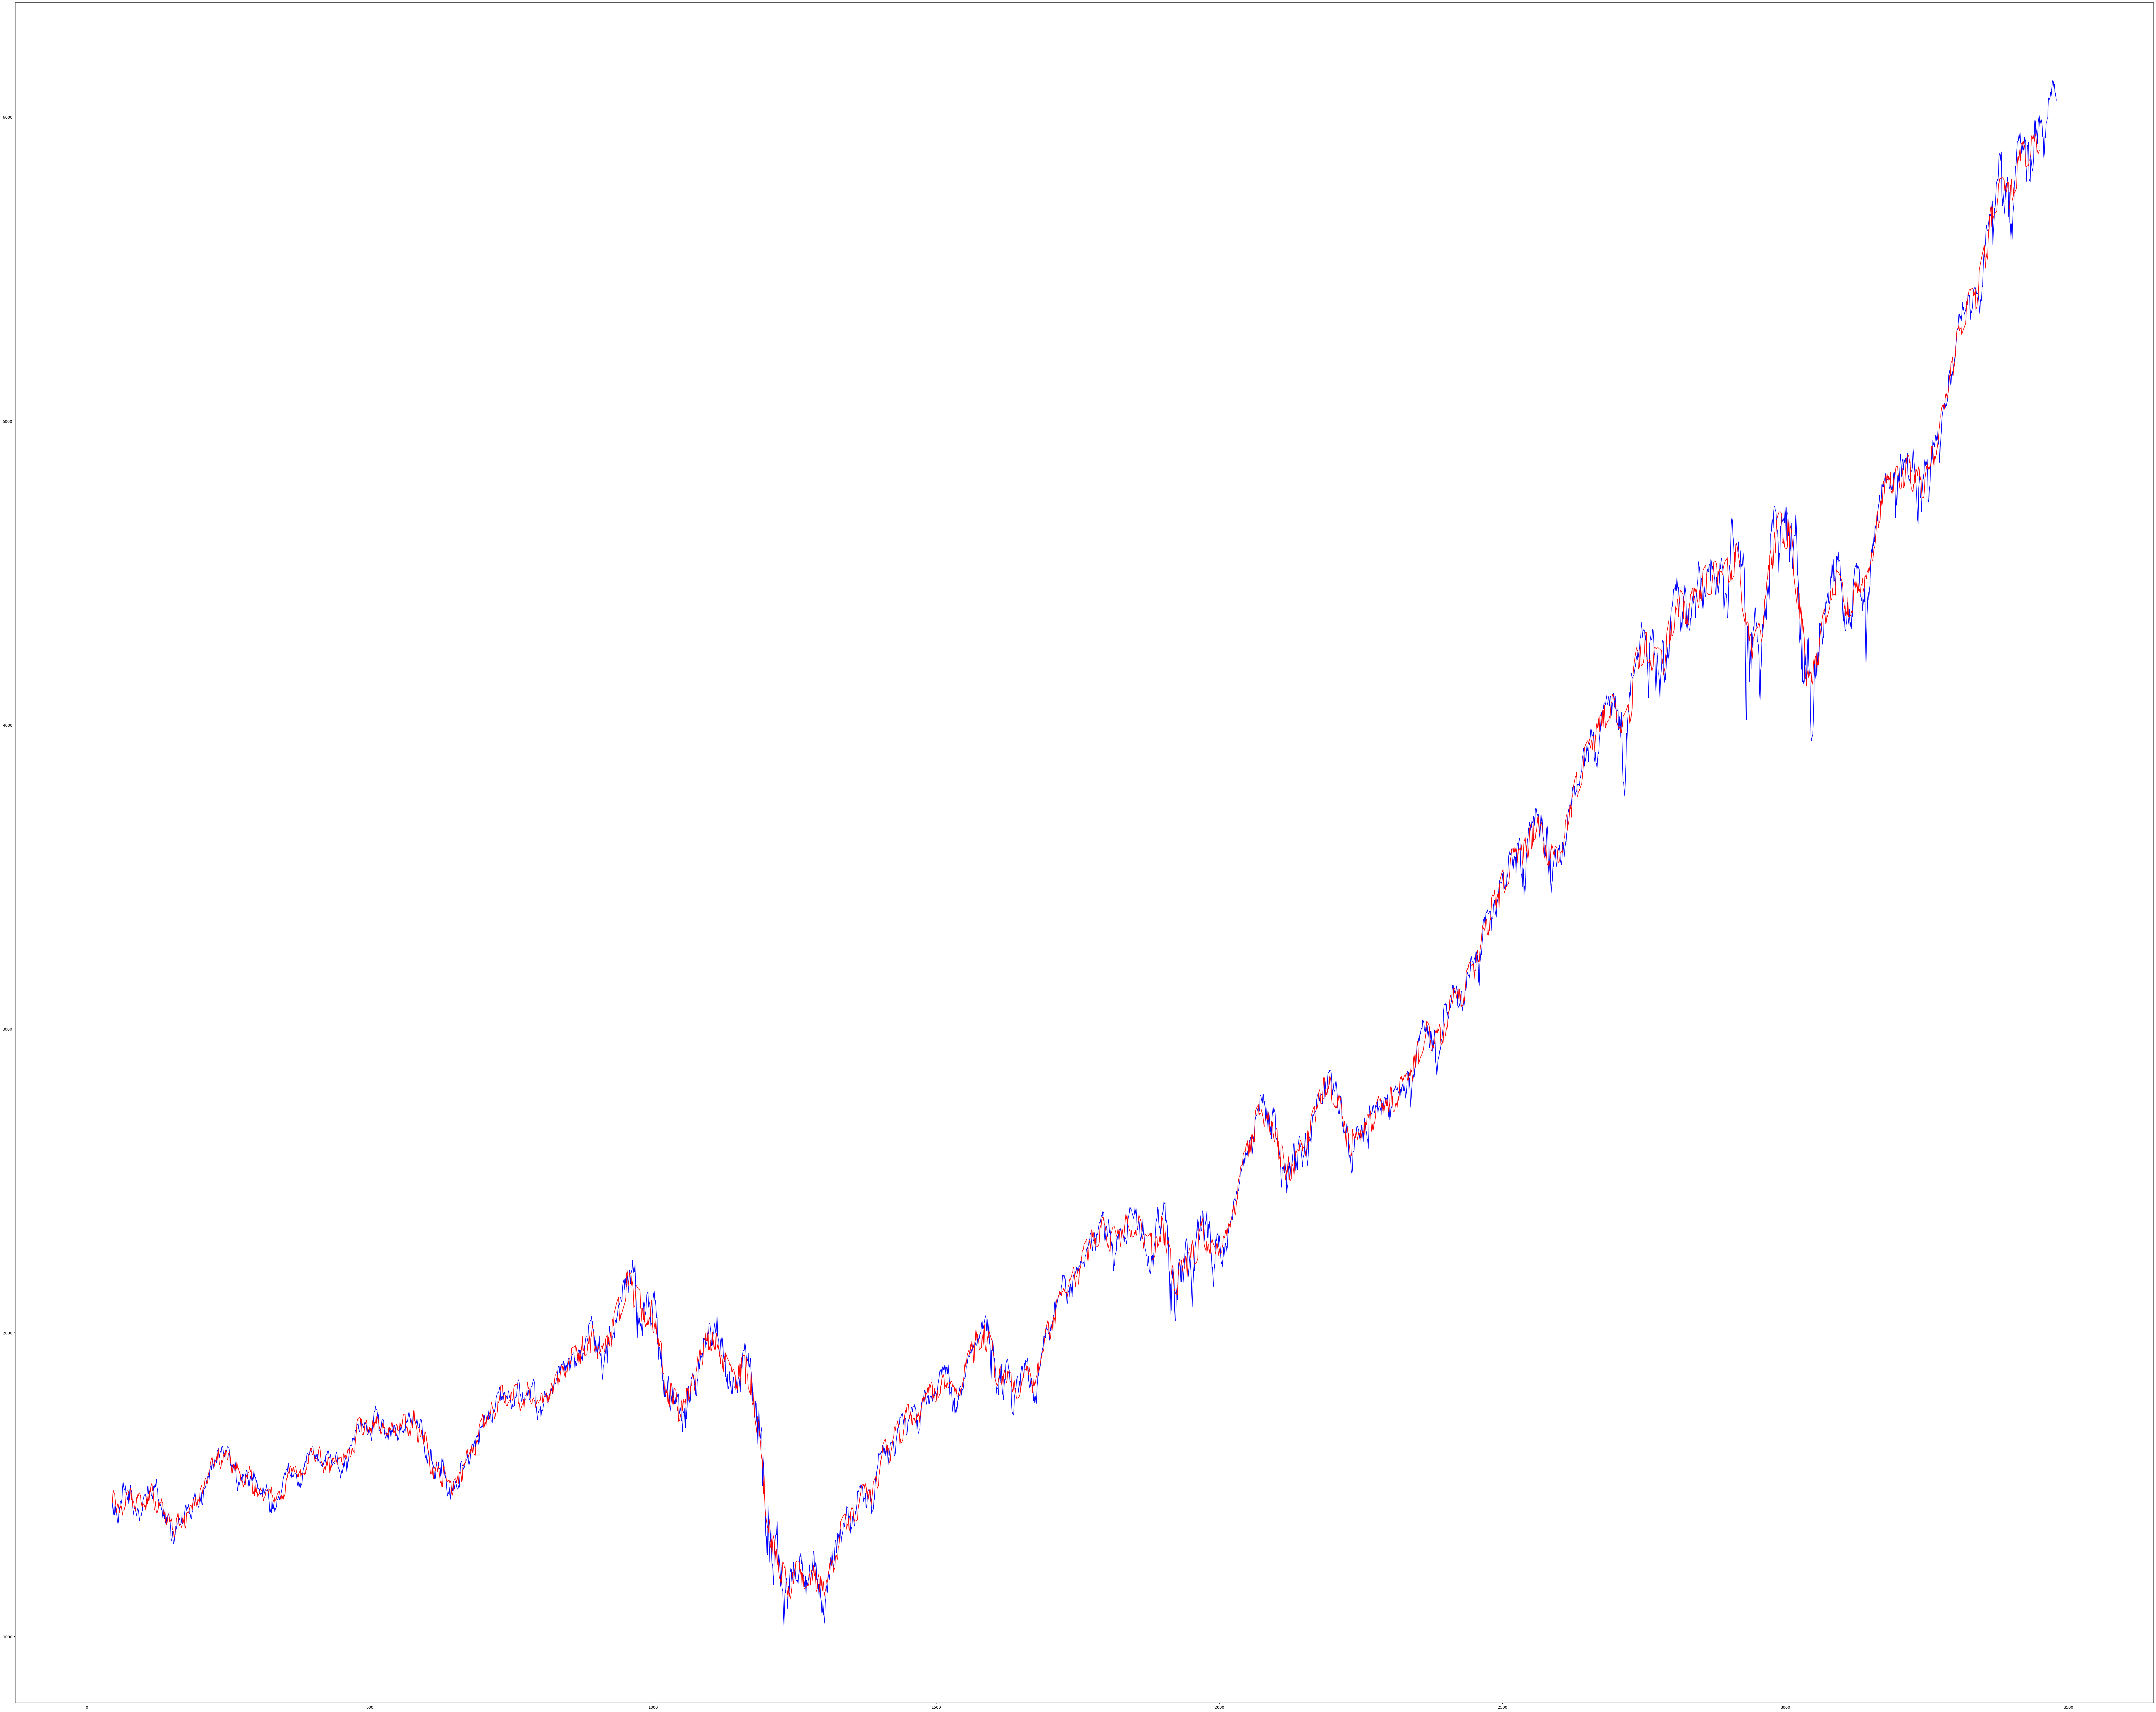

In [15]:
plt.figure(figsize=(100, 80))

plt.plot(data['close'].index, data['close'], color='blue')
plt.plot(observation.index, observation, color='red')

In [23]:
observation_test = trend_close + max(resid_high, resid_low)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [25]:
resid_high.head(30)

30          NaN
31          NaN
32          NaN
33          NaN
34          NaN
35          NaN
36          NaN
37          NaN
38          NaN
39          NaN
40          NaN
41          NaN
42          NaN
43          NaN
44          NaN
45    -2.485975
46    -3.004317
47   -19.929240
48   -17.820750
49   -26.508406
50   -37.899264
51   -22.953027
52   -29.415634
53   -28.872112
54   -66.331652
55   -59.236392
56   -57.030598
57   -23.775898
58   -19.671531
59    -3.435211
Name: resid, dtype: float64

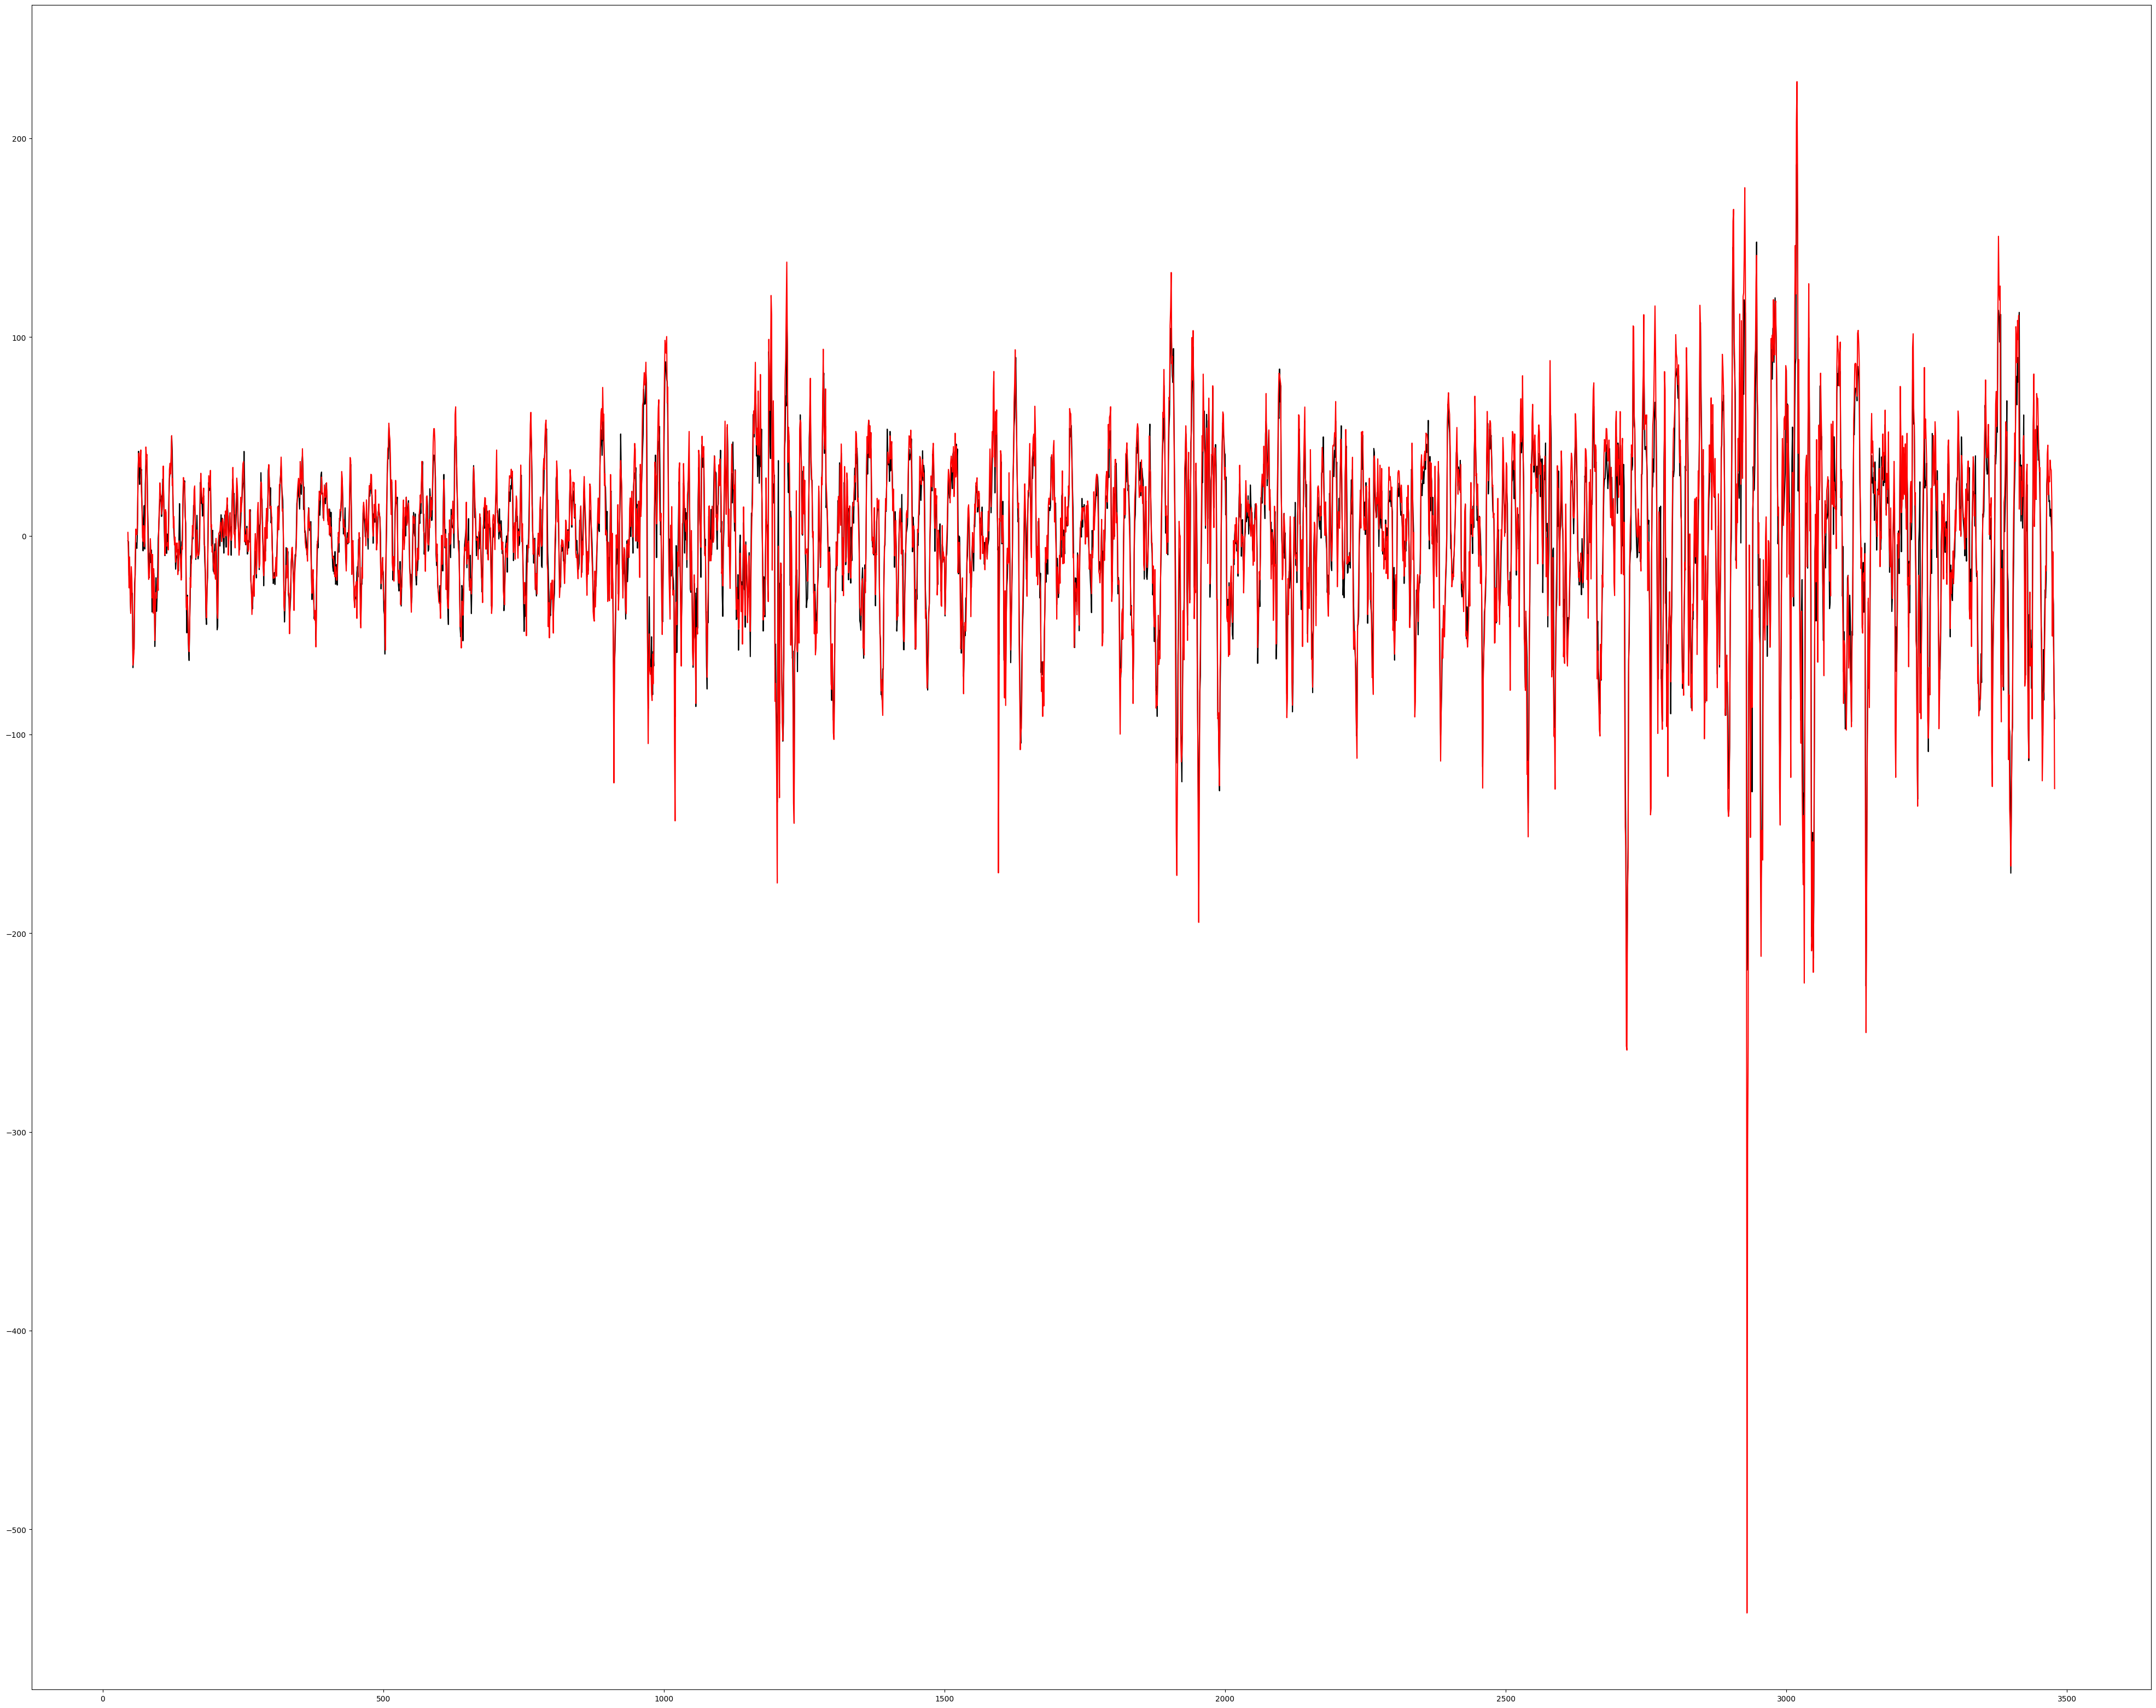

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 40))

plt.plot(resid_high, color='black')
plt.plot(resid_low, color='red')

In [37]:
import numpy as np
import pandas as pd

_resid_positive = np.maximum(resid_high[resid_high > 0], resid_low[resid_low > 0])
_resid_negative = np.maximum(resid_high[resid_high < 0], resid_low[resid_low < 0])

resid = pd.concat([_resid_positive, _resid_negative])

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 40))

plt.plot(resid, color='black')

In [39]:
_observation = trend_close + resid

In [41]:
import numpy as np
import pandas as pd

_resid_abs = np.maximum(abs(resid_high), abs(resid_low))

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 40))

plt.plot(_resid_abs, color='black')
plt.plot(-_resid_abs, color='black')

In [50]:
_observation2 = trend_close + _resid_abs
_observation3 = trend_close - _resid_abs

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 40))

plt.plot(_observation2, color='black')
plt.plot(_observation3, color='black')
plt.plot(trend_close, color='blue')